In [127]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd

In [129]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import extract
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [131]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [132]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [133]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [134]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [135]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 1.0, 'Inches of Rain/Day between 8/23/16-8/22/17')

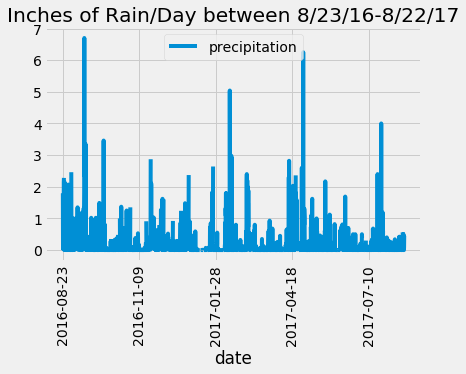

In [136]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.title("Inches of Rain/Day between 8/23/16-8/22/17")

In [137]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [138]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [139]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [140]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

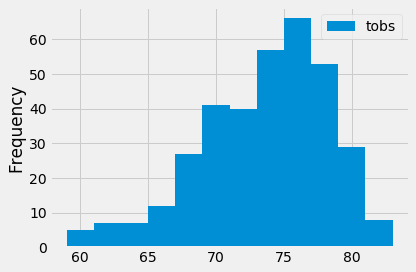

In [141]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [142]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
###session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
###filter(Measurement.station == 'USC00519281').all()

In [143]:
###results = session.query(Measurement.tobs).\
###filter(Measurement.station == 'USC00519281').\
###filter(Measurement.date >= prev_year).all()
###df = pd.DataFrame(results, columns=['tobs'])

# Challenge

In [164]:
#june rain grouped by station, describe()
june_prcp = session.query(Measurement.station, func.avg(Measurement.prcp)).filter(extract('month', Measurement.date) == 6).group_by(Measurement.station).all()
juneprcp_df = pd.DataFrame(june_prcp, columns=['station', 'precipitation'])
print(juneprcp_df)
juneprcp_df.describe()

       station  precipitation
0  USC00511918       0.015157
1  USC00513117       0.118248
2  USC00514830       0.114192
3  USC00516128       0.495748
4  USC00517948       0.057975
5  USC00518838       0.094615
6  USC00519281       0.151525
7  USC00519397       0.022661
8  USC00519523       0.050044


,precipitation
count,9.000000
mean,0.124463
std,0.146582
min,0.015157
25%,0.050044
50%,0.094615
75%,0.118248
max,0.495748


In [165]:
#june temp grouped by station, describe()
june_tobs = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 6).group_by(Measurement.station).all()
junetobs_df = pd.DataFrame(june_tobs, columns=['station', 'tobs'])
print(junetobs_df)
junetobs_df.describe()

       station       tobs
0  USC00511918  74.139394
1  USC00513117  74.050847
2  USC00514830  76.005376
3  USC00516128  71.937220
4  USC00517948  76.655405
5  USC00518838  73.394737
6  USC00519281  73.271186
7  USC00519397  77.559322
8  USC00519523  76.668103


,tobs
count,9.000000
mean,74.853510
std,1.919588
min,71.937220
25%,73.394737
50%,74.139394
75%,76.655405
max,77.559322


In [166]:
#Dec rain grouped by station, describe ()
dec_prcp = session.query(Measurement.station, func.avg(Measurement.prcp)).filter(extract('month', Measurement.date) == 12).group_by(Measurement.station).all()
decprcp_df = pd.DataFrame(dec_prcp, columns=['station', 'precipitation'])
print(decprcp_df)
decprcp_df.describe()

       station  precipitation
0  USC00511918       0.138146
1  USC00513117       0.203241
2  USC00514830       0.154966
3  USC00516128       0.507005
4  USC00517948       0.152727
5  USC00518838       0.638182
6  USC00519281       0.244931
7  USC00519397       0.075314
8  USC00519523       0.162010


,precipitation
count,9.000000
mean,0.252947
std,0.189780
min,0.075314
25%,0.152727
50%,0.162010
75%,0.244931
max,0.638182


In [167]:
#Dec temp grouped by station, describe ()
dec_tobs = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 12).group_by(Measurement.station).all()
dectobs_df = pd.DataFrame(dec_tobs, columns=['station', 'tobs'])
print(dectobs_df)
dectobs_df.describe()

       station       tobs
0  USC00511918  69.684211
1  USC00513117  71.069444
2  USC00514830  73.224719
3  USC00516128  69.291262
4  USC00517948  71.834862
5  USC00518838  72.421053
6  USC00519281  69.903226
7  USC00519397  71.109524
8  USC00519523  72.433333


,tobs
count,9.000000
mean,71.219070
std,1.376549
min,69.291262
25%,69.903226
50%,71.109524
75%,72.421053
max,73.224719
